Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing data
try:
    df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Documents\Project\Spotify\spotify_history.csv")
    print('File Loaded Successfully...')
except FileNotFoundError:
    print("Check the file path")

File Loaded Successfully...


In [3]:
#Top 5 rows
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
df_copy =  df

In [5]:
# Spotify Dataset Column Meaning

# 1. spotify_track_uri → Unique ID of the track in Spotify system
# 2. ts               → Timestamp (date and time) when the song was played
# 3. platform         → Device or app used (e.g. web player, android, ios, desktop)
# 4. ms_played        → How long the track was played (in milliseconds)
# 5. track_name       → Name of the song
# 6. artist_name      → Name of the artist
# 7. album_name       → Album from which the song belongs
# 8. reason_start     → How the playback started (e.g. autoplay, clickrow, fwdbtn, trackdone)
# 9. reason_end       → How the playback ended (e.g. clickrow, nextbtn, endplay, unknown)
# 10. shuffle         → Whether shuffle mode was ON (True/False)
# 11. skipped         → Whether the song was skipped (True/False)

In [6]:
df_copy.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [7]:
df_copy.shape

(149860, 11)

In [8]:
#checking the null values
df_copy.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [9]:
# removing the null values
df_copy.dropna(inplace=True)

In [10]:
#checking the data
df_copy.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [11]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False


In [12]:
#checking the data types
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149648 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149648 non-null  object
 1   ts                 149648 non-null  object
 2   platform           149648 non-null  object
 3   ms_played          149648 non-null  int64 
 4   track_name         149648 non-null  object
 5   artist_name        149648 non-null  object
 6   album_name         149648 non-null  object
 7   reason_start       149648 non-null  object
 8   reason_end         149648 non-null  object
 9   shuffle            149648 non-null  bool  
 10  skipped            149648 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.7+ MB


In [13]:
#converting ts data type into date formate
df_copy['ts'] = pd.to_datetime(df_copy['ts'], errors='coerce')

In [14]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False


In [15]:
# creating new columns
df_copy['played_second'] = df_copy['ms_played']/1000
df_copy['played_minutes'] = df_copy['ms_played']/60

In [16]:
df_copy.duplicated().sum()

np.int64(1185)

In [17]:
#removing the duplicates
df_copy.drop_duplicates(inplace=True) 

In [18]:
df_copy.duplicated().sum()

np.int64(0)

In [19]:
# 6) Normalize text columns for grouping/search
text_cols = ['track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end']
for c in text_cols:
    df_copy[c + '_'] = df_copy[c].astype(str).str.strip().str.lower().replace({'nan': None})

In [20]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,played_second,played_minutes,track_name_,artist_name_,album_name_,reason_start_,reason_end_
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,3.185,53.083333,"say it, just say it",the mowgli's,waiting for the dawn,autoplay,clickrow


In [21]:
# removing old columns
df_copy = df_copy.drop(columns=['track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end'])

In [22]:
df_copy.head()

,spotify_track_uri,ts,platform,ms_played,shuffle,skipped,played_second,played_minutes,track_name_,artist_name_,album_name_,reason_start_,reason_end_
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,False,False,3.185,53.083333,"say it, just say it",the mowgli's,waiting for the dawn,autoplay,clickrow
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,False,False,61.865,1031.083333,drinking from the bottle (feat. tinie tempah),calvin harris,18 months,clickrow,clickrow
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,False,False,285.386,4756.433333,born to die,lana del rey,born to die - the paradise edition,clickrow,unknown
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,False,False,134.022,2233.700000,off to the races,lana del rey,born to die - the paradise edition,trackdone,clickrow
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,False,False,0.000,0.000000,half mast,empire of the sun,walking on a dream,clickrow,nextbtn


In [23]:
df_copy = df_copy.sort_values('ts').reset_index(drop=True)
df_copy['date'] = df_copy['ts'].dt.date
df_copy['year'] = df_copy['ts'].dt.year
df_copy['month'] = df_copy['ts'].dt.month
df_copy['month_name'] = df_copy['ts'].dt.month_name()
df_copy['day'] = df_copy['ts'].dt.day
df_copy['hour'] = df_copy['ts'].dt.hour
df_copy['weekday'] = df_copy['ts'].dt.weekday
df_copy['weekday_name'] = df_copy['ts'].dt.day_name()
# ISO week (pandas >= 1.1)
df_copy['weekofyear'] = df_copy['ts'].dt.isocalendar().week

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148463 entries, 0 to 148462
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  148463 non-null  object        
 1   ts                 148463 non-null  datetime64[ns]
 2   platform           148463 non-null  object        
 3   ms_played          148463 non-null  int64         
 4   shuffle            148463 non-null  bool          
 5   skipped            148463 non-null  bool          
 6   played_second      148463 non-null  float64       
 7   played_minutes     148463 non-null  float64       
 8   track_name_        148463 non-null  object        
 9   artist_name_       148463 non-null  object        
 10  album_name_        148463 non-null  object        
 11  reason_start_      148463 non-null  object        
 12  reason_end_        148463 non-null  object        
 13  date               148463 non-null  object  

In [25]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,shuffle,skipped,played_second,played_minutes,track_name_,artist_name_,...,reason_end_,date,year,month,month_name,day,hour,weekday,weekday_name,weekofyear
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,False,False,3.185,53.083333,"say it, just say it",the mowgli's,...,clickrow,2013-07-08,2013,7,July,8,2,0,Monday,28


In [26]:
df_copy['prev_ts'] = df_copy['ts'].shift(1)
df_copy['gap_minutes'] = (df_copy['ts'] - df_copy['prev_ts']).dt.total_seconds() / 60.0
df_copy['new_session'] = (df_copy['gap_minutes'] > 30) | (df_copy['gap_minutes'].isna())
df_copy['session_id'] = df_copy['new_session'].cumsum().astype(int)

In [27]:
# top_artist = df['artist_name_norm'].value_counts().head(10)
# print(f'Top artist\n{top_artist}')

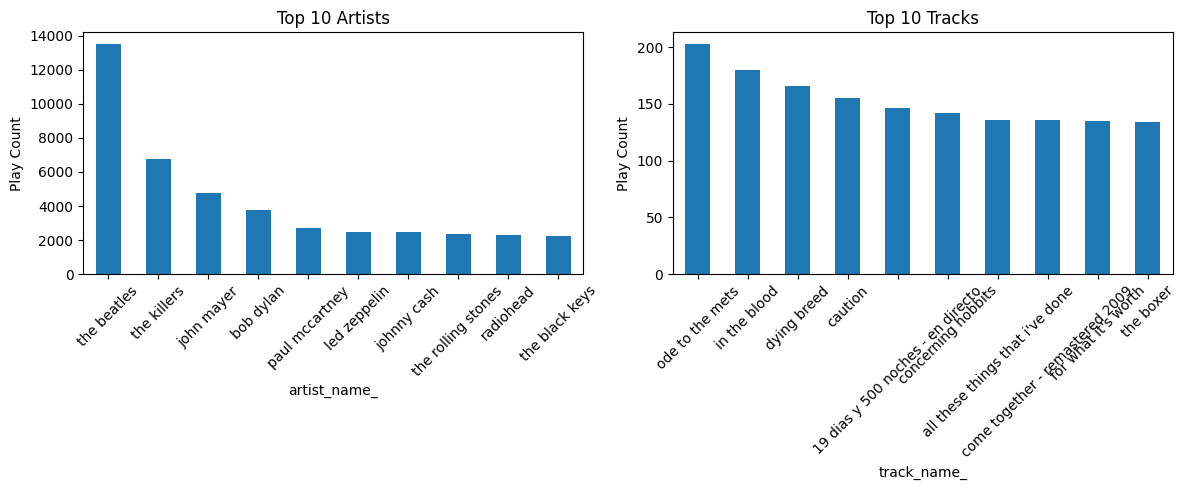

In [28]:
import matplotlib.pyplot as plt

top_artists = df_copy['artist_name_'].value_counts().head(10)
top_tracks = df_copy['track_name_'].value_counts().head(10)
# top_tracks
# top_artists


plt.figure(figsize=(12, 5))

# Top 10 Artists
plt.subplot(1, 2, 1)
top_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.ylabel('Play Count')
plt.xticks(rotation=45)

# Top 10 Tracks
plt.subplot(1, 2, 2)
top_tracks.plot(kind='bar')
plt.title('Top 10 Tracks')
plt.ylabel('Play Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
# ⬆️ Explanation of Above chart ⬆️

# I checked which artists and tracks are played the most. The Beatles had the highest plays, followed by The Killers and John Mayer. Other artists like Bob Dylan, Led Zeppelin, and Radiohead also had a strong presence.

# For tracks, the top songs also matched the same pattern where a few popular tracks were played again and again. This shows that users mostly listen to classic rock and legendary artists, and they repeat their favorite tracks many times.

In [30]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,shuffle,skipped,played_second,played_minutes,track_name_,artist_name_,...,month_name,day,hour,weekday,weekday_name,weekofyear,prev_ts,gap_minutes,new_session,session_id
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,False,False,3.185,53.083333,"say it, just say it",the mowgli's,...,July,8,2,0,Monday,28,NaT,NaN,True,1


In [31]:
# Top 5 skipped tracks (immediately skipped)
top_skipped_tracks = (df_copy[df_copy['skipped']].groupby('track_name_').size().sort_values(ascending=False).head(5))
print("Top 5 skipped tracks:\n", top_skipped_tracks)

# Top 5 skipped artists
top_skipped_artists = (df_copy[df_copy['skipped']].groupby('artist_name_').size().sort_values(ascending=False).head(5))
print("\nTop 5 skipped artists:\n", top_skipped_artists)

# Skip patterns by platform
skip_platform = (df_copy.groupby('platform')['skipped'].mean().sort_values(ascending=False))
print("\nSkip rate by platform:\n", skip_platform)


Top 5 skipped tracks:
 track_name_
paraíso              29
photograph           22
superheroes          21
switzerland          20
what do you mean?    20
dtype: int64

Top 5 skipped artists:
 artist_name_
the beatles           388
the killers           196
bob dylan             161
john mayer            150
the rolling stones    125
dtype: int64

Skip rate by platform:
 platform
windows           0.140745
iOS               0.066854
mac               0.061224
android           0.051912
cast to device    0.000000
web player        0.000000
Name: skipped, dtype: float64


In [32]:
# ⬆️ Explanation of Above Output ⬆️

# I checked which tracks and artists are skipped the most. Interestingly, some of the most played artists like The Beatles and The Killers also appear in the top skipped list. This shows that while users try songs from popular artists, not all songs are equally liked, and some are skipped immediately.

# Platform also affects skipping: Windows users skip more often, while web player and cast devices have almost no skips. This insight can help Spotify improve song recommendations and reduce unnecessary skips.

In [33]:
# Skip patterns by hour of day
skip_hour = (df_copy.groupby('hour')['skipped'].mean()).sort_values(ascending=False)
print("\nSkip rate by hour of day:\n", skip_hour)


Skip rate by hour of day:
 hour
2     0.090273
7     0.089610
1     0.088763
8     0.080505
22    0.068850
0     0.068037
21    0.063179
23    0.058266
4     0.052092
3     0.049238
20    0.045573
5     0.045556
6     0.041706
9     0.037344
10    0.036454
15    0.030842
19    0.029543
17    0.028438
16    0.024516
18    0.022235
14    0.020641
13    0.020171
12    0.011050
11    0.002217
Name: skipped, dtype: float64


In [34]:
# Skip patterns by weekday
skip_weekday = (df_copy.groupby('weekday_name')['skipped'].mean())
print("\nSkip rate by weekday:\n", skip_weekday)


Skip rate by weekday:
 weekday_name
Friday       0.062490
Monday       0.066894
Saturday     0.068572
Sunday       0.054325
Thursday     0.035171
Tuesday      0.043927
Wednesday    0.034962
Name: skipped, dtype: float64


In [35]:
user_listening_trend = df_copy.groupby('weekday_name')['played_minutes'].sum().sort_values(ascending=False)
user_listening_trend = user_listening_trend.map('{:,.0f}'.format)
user_listening_trend

weekday_name
Friday       52,488,064
Wednesday    48,395,645
Thursday     46,947,276
Tuesday      45,644,810
Monday       45,263,232
Sunday       39,144,598
Saturday     38,932,579
Name: played_minutes, dtype: object

In [36]:
# Group by hour and sum played_minutes to find peak listening time
listening_by_hour = df_copy.groupby('hour')['played_minutes'].sum()
peak_hour = listening_by_hour.idxmax()
print(f"User listens to most songs at hour: {peak_hour}")
print(listening_by_hour.sort_values(ascending=False).head(5))

User listens to most songs at hour: 18
hour
18    2.248885e+07
17    2.248420e+07
0     2.176764e+07
20    2.144706e+07
19    2.088523e+07
Name: played_minutes, dtype: float64


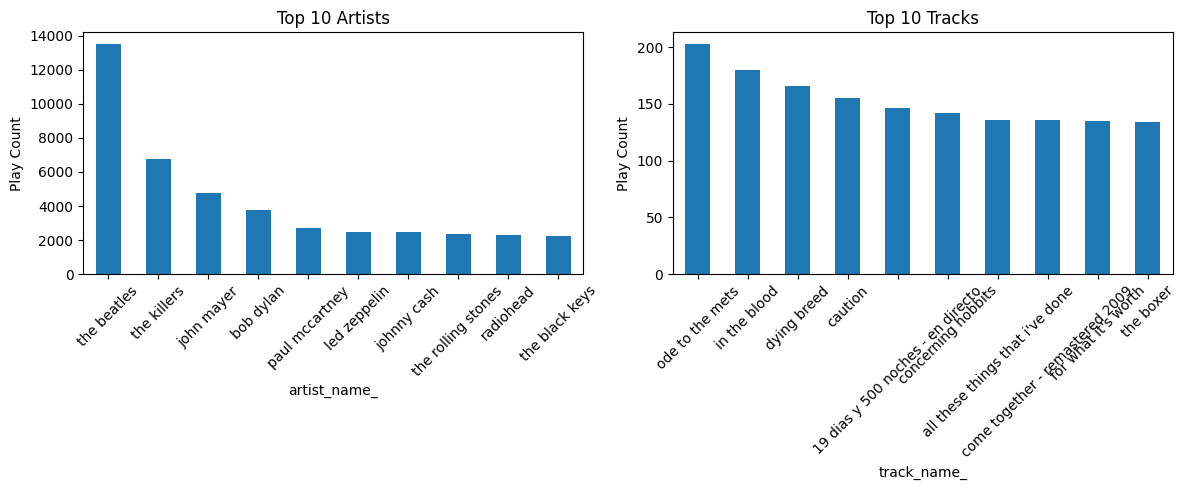

In [37]:
import matplotlib.pyplot as plt

top_artists = df_copy['artist_name_'].value_counts().head(10)
top_tracks = df_copy['track_name_'].value_counts().head(10)


plt.figure(figsize=(12, 5))

# Top 10 Artists
plt.subplot(1, 2, 1)
top_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.ylabel('Play Count')
plt.xticks(rotation=45)

# Top 10 Tracks
plt.subplot(1, 2, 2)
top_tracks.plot(kind='bar')
plt.title('Top 10 Tracks')
plt.ylabel('Play Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

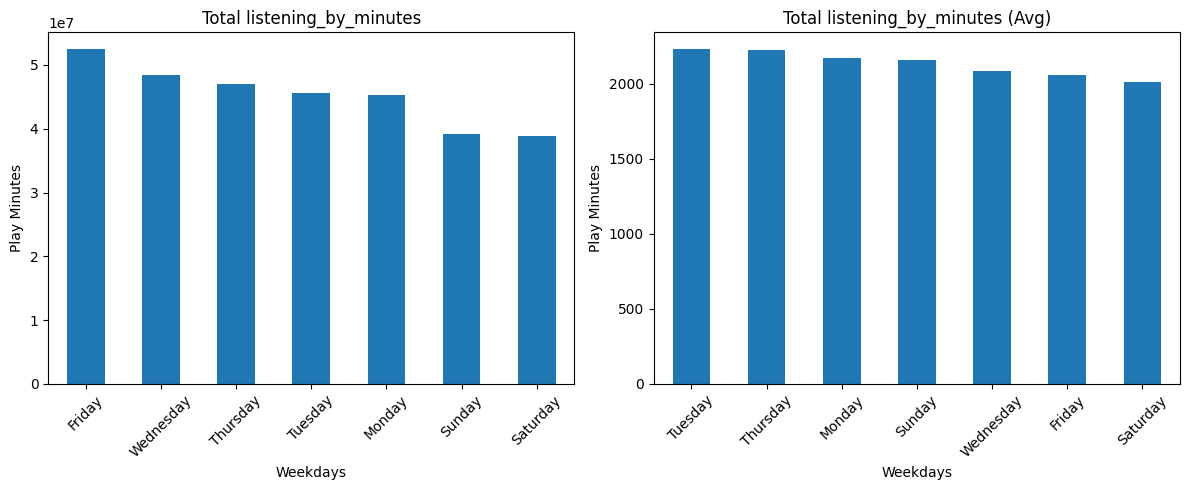

In [38]:
user_listening_trend = df_copy.groupby('weekday_name')['played_minutes'].sum().sort_values(ascending=False)
# user_listening_trend = user_listening_trend.map('{:,.0f}'.format)
user_listening_trend_avg = df_copy.groupby('weekday_name')['played_minutes'].mean().sort_values(ascending=False)
user_listening_trend

plt.figure(figsize=(12, 5))

# Total listening minutes by weekday
plt.subplot(1, 2, 1)
user_listening_trend.plot(kind='bar')
plt.title('Total listening_by_minutes')
plt.xlabel('Weekdays')
plt.ylabel('Play Minutes')
plt.xticks(rotation=45)

# Average listening minutes by weekday
plt.subplot(1, 2, 2)
user_listening_trend_avg.plot(kind='bar')
plt.title('Total listening_by_minutes (Avg)')
plt.xlabel('Weekdays')
plt.ylabel('Play Minutes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


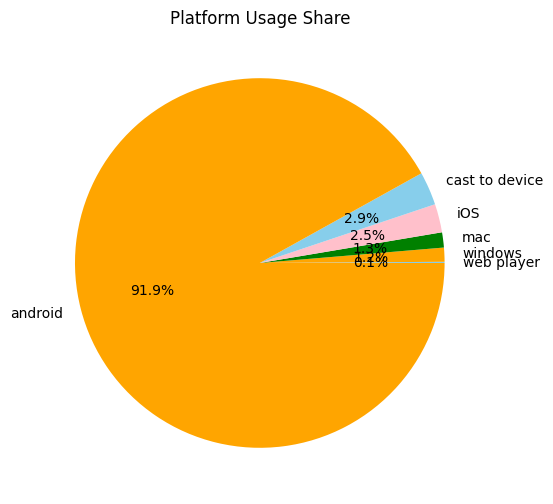

In [39]:
# platform usage by user

platform_usage = df_copy.groupby('platform')['played_minutes'].sum().sort_values(ascending=True)

platform_usage.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['skyblue','orange','green','pink'])
plt.title('Platform Usage Share')
plt.ylabel('')
plt.show()

In [40]:
df_copy.head(1)

,spotify_track_uri,ts,platform,ms_played,shuffle,skipped,played_second,played_minutes,track_name_,artist_name_,...,month_name,day,hour,weekday,weekday_name,weekofyear,prev_ts,gap_minutes,new_session,session_id
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,False,False,3.185,53.083333,"say it, just say it",the mowgli's,...,July,8,2,0,Monday,28,NaT,NaN,True,1
